In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-dataset/Housing.csv


**Load the data**

In [2]:
house_data = pd.read_csv('/kaggle/input/housing-dataset/Housing.csv')

**Preliminary Analysis**

In [3]:
house_data.shape

(545, 13)

In [4]:
house_data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
house_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
house_data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [8]:
house_data.duplicated().values.any()

False

In [9]:
house_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


**Import Liberary**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([ 61., 163., 139.,  89.,  46.,  25.,  13.,   4.,   1.,   4.]),
 array([ 1750000.,  2905000.,  4060000.,  5215000.,  6370000.,  7525000.,
         8680000.,  9835000., 10990000., 12145000., 13300000.]),
 <BarContainer object of 10 artists>)

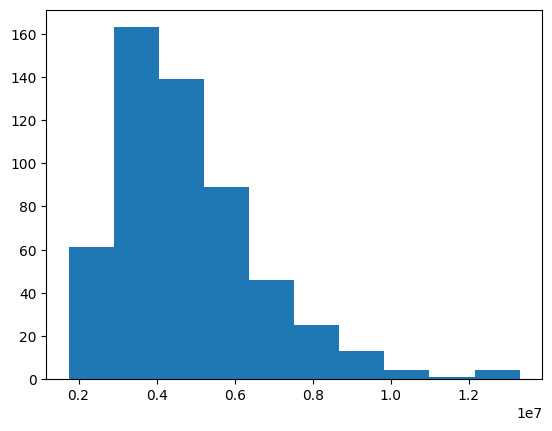

In [11]:
plt.hist(house_data.price)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

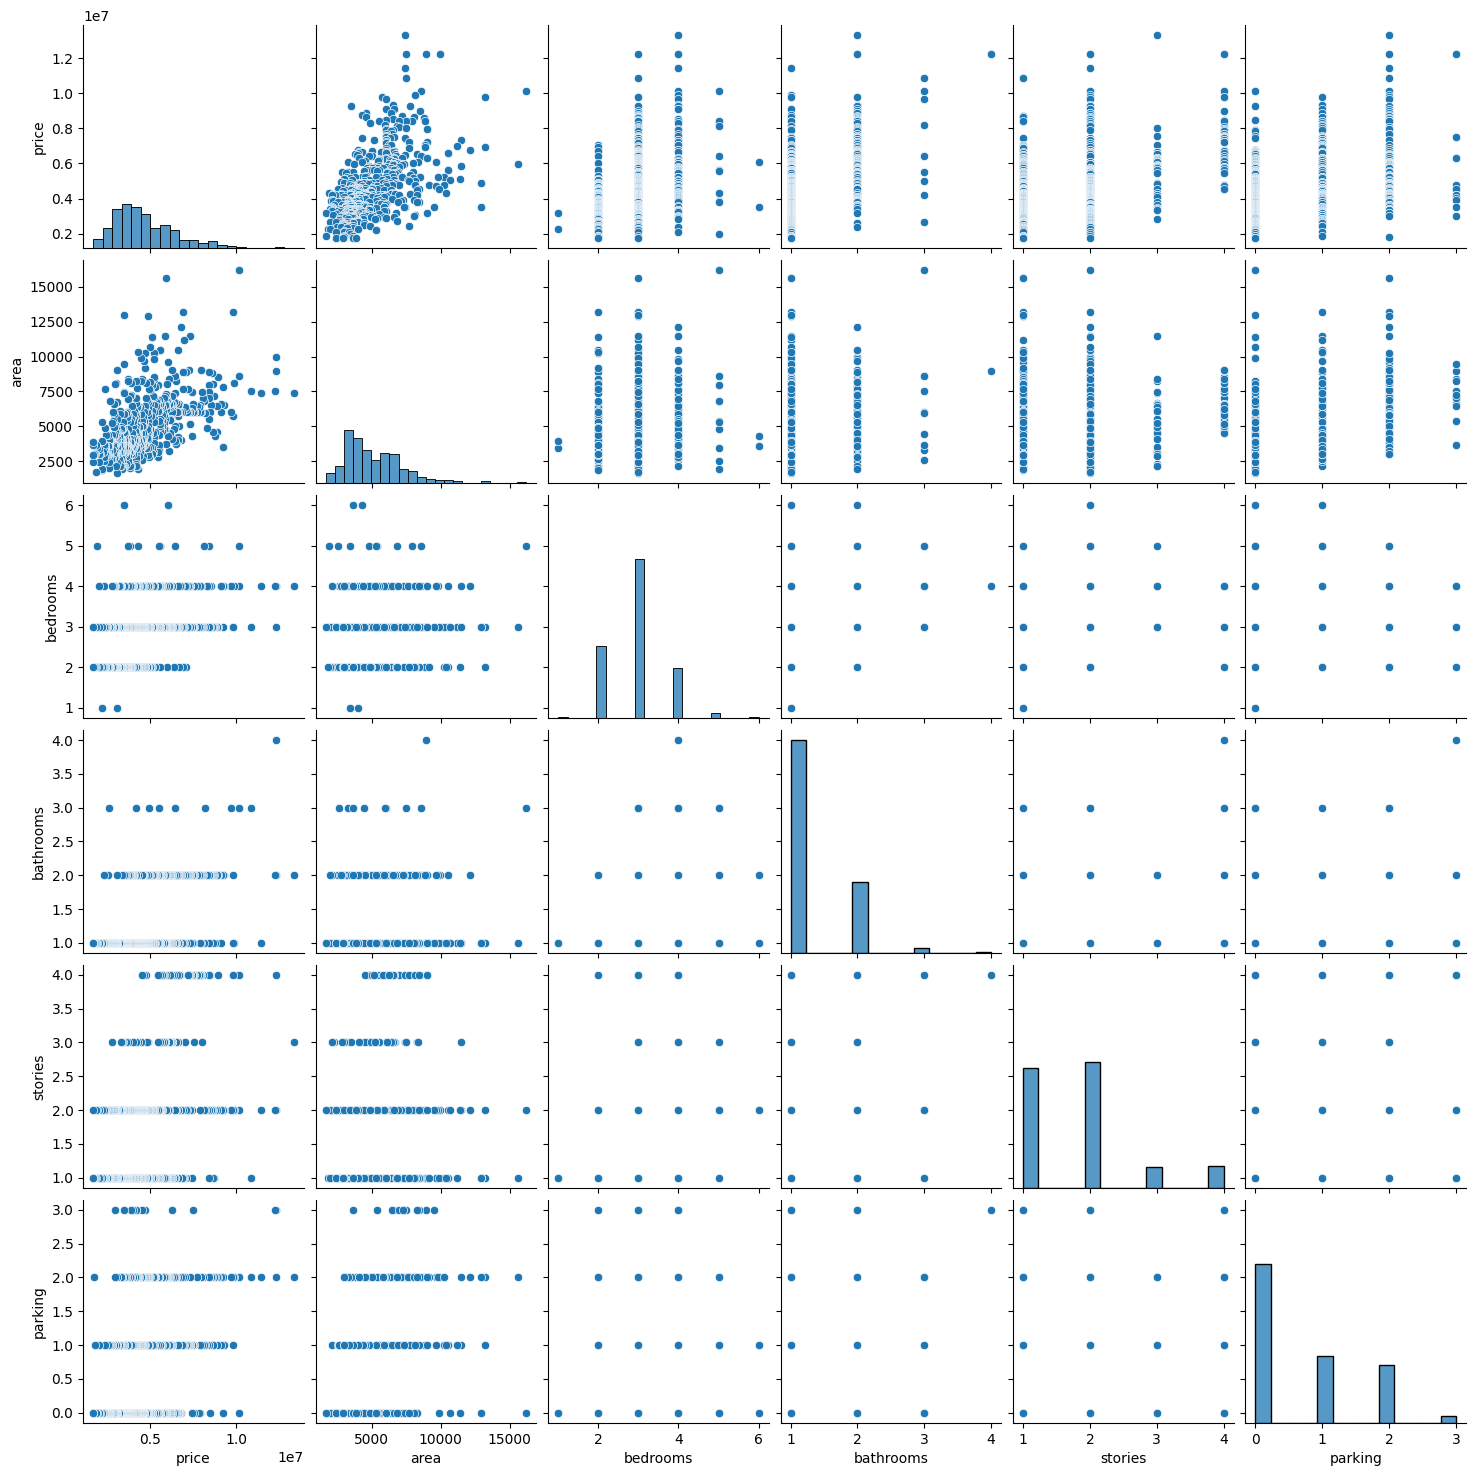

In [12]:
sns.pairplot(house_data)

In [13]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(house_data, train_size=0.8, random_state=10)

In [14]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
443,3220000,4320,3,1,1,no,no,no,no,no,1,no,unfurnished
323,4025000,5400,3,1,1,yes,no,no,no,no,3,no,semi-furnished
157,5495000,2817,4,2,2,no,yes,yes,no,no,1,no,furnished
231,4690000,4320,3,1,1,yes,no,no,no,no,0,yes,semi-furnished
351,3780000,3600,2,1,1,yes,no,no,no,no,0,no,semi-furnished


In [15]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
482,2940000,3150,3,1,2,no,no,no,no,no,0,no,unfurnished
314,4095000,4040,2,1,2,yes,no,no,no,no,1,no,semi-furnished
383,3570000,4500,4,2,2,yes,no,yes,no,no,2,no,furnished
487,2870000,5400,4,1,2,yes,no,no,no,no,0,no,unfurnished
43,7700000,6000,4,2,4,yes,no,no,no,no,2,no,semi-furnished


**Lets resolve the Categorical Columns**

In [16]:
# list of columns labels that are categorical and numerical respectively
cat_col = [col for col in house_data.columns if house_data[col].dtypes == 'O']
num_col = [col for col in house_data.columns if house_data[col].dtypes in ['int64', 'float']]

In [17]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
train_result = pd.DataFrame(oe.fit_transform(df_train[cat_col])).astype(int)
train_result.columns = cat_col
train_result.index = df_train.index
train_result.sample(5)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
524,1,0,0,0,0,0,2
23,1,1,1,0,1,0,0
146,1,0,0,0,0,0,1
445,1,0,0,0,0,0,0
418,1,0,0,0,1,0,2


In [18]:
test_result = pd.DataFrame(oe.fit_transform(df_test[cat_col])).astype(int)
test_result.columns = cat_col
test_result.index = df_test.index
test_result.sample(5)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
107,1,0,1,0,0,1,2
483,1,0,0,0,0,0,1
266,1,0,0,0,0,1,2
65,1,0,1,0,1,0,0
307,1,0,0,0,0,0,1


In [19]:
df_train_updated = pd.concat([df_train[num_col], train_result], axis=1)
df_test_updated = pd.concat([df_test[num_col], test_result], axis=1)

In [20]:
df_train_updated.corr()

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
price,1.000000,0.530326,0.357839,0.494152,0.411376,0.383448,0.283153,0.259940,0.217708,0.097145,0.455360,0.343280,-0.322464
area,0.530326,1.000000,0.109372,0.163872,0.085564,0.403149,0.268774,0.122746,0.067032,-0.005492,0.230790,0.275665,-0.206018
bedrooms,0.357839,0.109372,1.000000,0.368564,0.377708,0.159845,-0.035353,0.098983,0.119163,0.044958,0.160196,0.070757,-0.147853
bathrooms,0.494152,0.163872,0.368564,1.000000,0.315548,0.183729,0.045180,0.172443,0.117333,0.075682,0.204903,0.092871,-0.187763
stories,0.411376,0.085564,0.377708,0.315548,1.000000,0.026130,0.142825,0.061337,-0.180341,0.013982,0.322502,0.039715,-0.129017
parking,0.383448,0.403149,0.159845,0.183729,0.026130,1.000000,0.204709,0.051943,0.083347,0.081722,0.121414,0.082922,-0.138377
mainroad,0.283153,0.268774,-0.035353,0.045180,0.142825,0.204709,1.000000,0.060698,0.035158,-0.016026,0.083949,0.196197,-0.162132
guestroom,0.259940,0.122746,0.098983,0.172443,0.061337,0.051943,0.060698,1.000000,0.344509,-0.009304,0.157837,0.120601,-0.101711
basement,0.217708,0.067032,0.119163,0.117333,-0.180341,0.083347,0.035158,0.344509,1.000000,0.009494,0.064392,0.223982,-0.110226
hotwaterheating,0.097145,-0.005492,0.044958,0.075682,0.013982,0.081722,-0.016026,-0.009304,0.009494,1.000000,-0.145693,-0.059629,-0.037642


<Axes: >

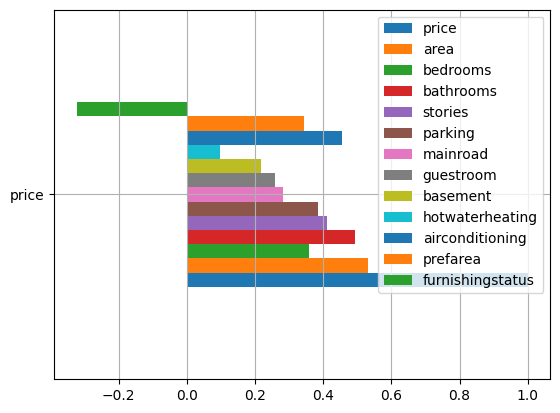

In [21]:
# corr Analysis to know the relationship of the unsupervised variables to price.

df_train_updated.corr().head(1).plot(kind='barh', grid=True)

In [22]:
y = df_train_updated.pop('price')
X = df_train_updated

test_y = df_test_updated.pop('price')
test_X = df_test_updated

In [23]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=10)
model.fit(X, y)
predictions = model.predict(test_X)

In [24]:
result = pd.DataFrame({'Prices': predictions})
result.index = df_test.index
result.head()

,Prices
482,2711730.0
314,3906350.0
383,5321470.0
487,3253355.0
43,6976142.6


# **Model Evaluation**

In [25]:
from sklearn.metrics import mean_absolute_error as mae

# Mean Absolute error for test data which is also external data
mae_score = mae(test_y, predictions) / 1000
mae_score

748.3603712538227

In [26]:
# Mean Absolute error for train data which is also same data with the training data.
model1 = model
model1.fit(X, y)
model1_predictions = model1.predict(X)

mae_score1 = mae(y, model1_predictions) / 1000
mae_score1

322.61319036697245

**Data validation**

In [27]:
val_data = df_train.copy()

yv = val_data.pop('price')
Xv = val_data

train_X, val_X, train_y, val_y = train_test_split(Xv, yv,train_size=0.8, random_state=10)

In [28]:
oe_v = OrdinalEncoder()
train_X_result = pd.DataFrame(oe_v.fit_transform(train_X[cat_col])).astype(int)
val_X_result = pd.DataFrame(oe_v.transform(val_X[cat_col])).astype(int)

train_X_result.columns = cat_col
val_X_result.columns = cat_col


train_X_result.index = train_X.index
val_X_result.index = val_X.index

In [29]:
train_X_result.sample(5)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
35,1,0,0,0,1,0,0
443,0,0,0,0,0,0,2
454,1,0,0,0,1,0,2
332,1,1,1,0,0,0,1
351,1,0,0,0,0,0,1


In [30]:
val_X_result.sample(5)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
277,1,0,0,0,0,1,1
106,1,0,1,0,1,1,1
324,0,0,1,0,1,0,1
232,1,0,1,0,0,0,0
486,1,0,0,0,0,0,1


In [31]:
train_X_updated = pd.concat([train_X[num_col[1:]], train_X_result], axis=1)
val_X_updated = pd.concat([val_X[num_col[1:]], val_X_result], axis=1)

In [32]:
def get_scores(n_estimators, X, y, v_X, v_y):
    
    val_model = RandomForestRegressor(n_estimators=n_estimators, random_state=10)

    val_model.fit(X, y)
    val_model_predictions = val_model.predict(v_X)

    mae_score = mae(v_y, val_model_predictions) / 1000
    return mae_score

In [33]:
 estimators_scores = {n_estimators: get_scores(n_estimators, train_X_updated,train_y, val_X_updated, val_y) for n_estimators in np.arange(50, 1001, 50)}

In [34]:
estimators_scores_df = pd.DataFrame({'n_estimators':estimators_scores.keys(), 'scores':estimators_scores.values()}, index=np.arange(0, len(estimators_scores)))
estimators_scores_df.scores = round(estimators_scores_df.scores, 2).astype(float)

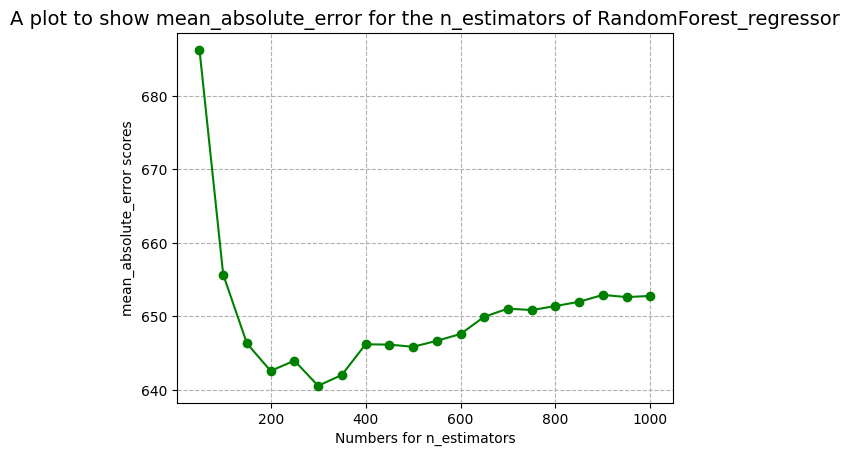

In [35]:
plt.title('A plot to show mean_absolute_error for the n_estimators of RandomForest_regressor', fontsize=14)
plt.grid(linestyle='--')
plt.ylabel('mean_absolute_error scores')
plt.xlabel('Numbers for n_estimators')
plt.plot(estimators_scores_df.n_estimators, estimators_scores_df.scores, marker='o', color='green')

# **FINAL PREDICTION**

In [36]:
# implementation of the n_estimator with the minimum value of mae

final_model = RandomForestRegressor(n_estimators=300, random_state=10)
final_model.fit(X, y)
final_predictions = final_model.predict(test_X)

In [37]:
final_result = pd.DataFrame({'Prices': final_predictions})
final_result.index = df_test.index
final_result.head()

,Prices
482,2.811521e+06
314,3.906350e+06
383,5.424067e+06
487,3.321628e+06
43,7.010812e+06


In [38]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaled = scaler.fit_transform(house_data)
# scaled